**¡Hola Dante! 😊**

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima iteración. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
¡Hola Alejandro! 😊

Espero que te encuentres bien. Agradezco mucho tus comentarios y el tiempo que has tomado para revisar mi proyecto.

Quiero informarte que ya he corregido los errores que me señalaste. He ajustado la tabla de los mensajes para evitar la repetición de datos. También he corregido la fórmula de la resta de los "total GB", lo que me permitió darme cuenta de que había un error en mi cálculo de los ingresos extra de Ultimate. Ahora todo tiene más sentido y los datos son más claros.Además, utilicé la prueba de Levene para verificar la igualdad de varianzas entre los planes Ultimate y Surf. Al detectar que las varianzas eran diferentes, ajusté la prueba t utilizando equal_var=False, lo que garantizó resultados más precisos y válidos.

Te agradezco mucho por tu ayuda, tus observaciones han sido muy valiosas.

¡Muchas gracias nuevamente!

Saludos cordiales,
Dante   
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

----

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dante has demostrado buenas habilidades en la etapa de preparación de datos para tu proyecto, lo cual establece una base firme para tu análisis. En el apartado de visualización, utilizaste herramientas efectivas para comprender el comportamiento de consumo de los usuarios en diferentes planes, aunque resulta clave que uses la misma estructura de análsis que empleaste para los datos de llamadas en los demás conjuntos de datos. Por otro lado, tu enfoque en las pruebas de hipótesis refleja un buen dominio de la metodología para realizar comparaciones estadísticas en diferentes conjuntos de datos. 

Sin embargo, es necesario ajustar el cálculo del consumo de mensajes e internet para determinar con mayor precisión el cobro mensual por usuario, un aspecto clave para la validez de tus conclusiones. ¡No te preocupes! Cada ajuste que haces es una oportunidad para aprender y mejorar. Vas por buen camino, y estoy seguro de que en la siguiente versión harás un gran trabajo y lograrás completar el proyecto con éxito. ¡Sigue adelante! 

Estaré atento a tu próxima iteración 👀



</div>

<div class="alert alert-block alert-success">
<b>Comentario General del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

¡Dante excelente trabajo con los ajustes! Tu proyecto ahora cumple con todos los objetivos propuestos. Me alegra que mis indicaciones te hayan servido,
    
    
Estoy seguro de que lo que aprendiste aquí te será muy útil en futuros proyectos. ¡Éxito en tu próximo sprint! 🚀

*Estado del Proyecto:* **Aprobado**

</div>

---

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El objetivo de este análisis es determinar qué tarifa, Surf o Ultimate, genera más ingresos para Megaline. Los resultados servirán como base para tomar decisiones, permitiendo a la empresa optimizar su estrategia enfocándose en la tarifa más rentable o equilibrando los ingresos entre ambas. Las acciones que planeo realizar incluyen la segmentación de los clientes por tarifa, el cálculo de los ingresos generados por cada tarifa, el análisis del comportamiento de los clientes y la visualización y comparación de los ingresos.



## Inicialización

In [64]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import math as mt
from datetime import datetime



## Cargar datos

In [65]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')



## Preparar los datos

In [66]:
# Explora cada una para tener una comprensión inicial de los datos
calls.info(), messages.info(), internet.info(), users.info(), plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id         

(None, None, None, None, None)

In [67]:
# Muestra algunas filas de cada DataFrame
calls.head(), messages.head(), internet.head(), users.head(), plans.head()

(         id  user_id   call_date  duration
 0   1000_93     1000  2018-12-27      8.52
 1  1000_145     1000  2018-12-27     13.66
 2  1000_247     1000  2018-12-27     14.48
 3  1000_309     1000  2018-12-28      5.76
 4  1000_380     1000  2018-12-30      4.22,
          id  user_id message_date
 0  1000_125     1000   2018-12-27
 1  1000_160     1000   2018-12-31
 2  1000_223     1000   2018-12-31
 3  1000_251     1000   2018-12-27
 4  1000_255     1000   2018-12-26,
          id  user_id session_date  mb_used
 0   1000_13     1000   2018-12-29    89.86
 1  1000_204     1000   2018-12-31     0.00
 2  1000_379     1000   2018-12-28   660.40
 3  1000_413     1000   2018-12-26   270.99
 4  1000_442     1000   2018-12-27   880.22,
    user_id first_name  last_name  age                                   city  \
 0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
 1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
 2     1002     

## Tarifas

In [68]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [69]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Los datos proporcionados son correctos por sí mismos; sin embargo, es necesario crear algunas columnas adicionales para facilitar su interpretación y manipulación, como la conversión de MB a GB. Además, los datos no incluyen información sobre el consumo de extras por parte de cada usuario.

## Corregir datos

In [70]:
# Verificar los valores únicos en 'plan_name' para asegurarnos de que no haya inconsistencias
plans['plan_name'].unique()

array(['surf', 'ultimate'], dtype=object)

In [71]:
# Verificar valores nulos en 'plans'
plans.isnull().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [72]:
plans['mb_per_month_included'] = plans['mb_per_month_included'].astype(float)

## Enriquecer los datos

In [73]:
# Convertir 'mb_per_month_included' a GB
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

In [74]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360.0,500,20,10,0.03,0.03,surf,15.0
1,1000,30720.0,3000,70,7,0.01,0.01,ultimate,30.0


## Usuarios/as

In [75]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.describe()


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [76]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Los datos están completos, ya que no presentan valores nulos ni faltantes.
no se requieren ajustes adicionales en este aspecto.

### Corregir los datos

In [77]:
# Convertir 'reg_date' y 'churn_date' a tipo datetime
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

### Enriquecer los datos

In [78]:
# Extraer el año y mes de 'reg_date' y 'churn_date'
users['reg_year'] = users['reg_date'].dt.year
users['reg_month'] = users['reg_date'].dt.month
users['churn_year'] = users['churn_date'].dt.year
users['churn_month'] = users['churn_date'].dt.month

In [79]:
# Ver la distribución de planes
plan_distribution = users['plan'].value_counts()
plan_distribution

surf        339
ultimate    161
Name: plan, dtype: int64

In [80]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_year,reg_month,churn_year,churn_month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,2018,12,NaN,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2018,8,NaN,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2018,10,NaN,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2018,1,NaN,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2018,5,NaN,NaN


## Llamadas

In [81]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.describe()



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [82]:
# Imprime una muestra de datos para las llamadas
calls.head()



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Convertiremos las fechas a formato datetime para facilitar la manipulación de los datos y así poder realizar divisiones mensuales de manera más eficiente.

### Corregir los datos

In [83]:
# Convertir la columna 'call_date' a tipo datetime
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

In [84]:
# Calcular el número total de llamadas por usuario
calls['call_count'] = calls.groupby('user_id')['id'].transform('count')

In [85]:
# Extraer mes y año de la columna 'call_date'
calls['year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month
calls['duration'] = np.ceil(calls['duration'])

In [86]:
calls.head()

,id,user_id,call_date,duration,call_count,year,month
0,1000_93,1000,2018-12-27,9.0,16,2018,12
1,1000_145,1000,2018-12-27,14.0,16,2018,12
2,1000_247,1000,2018-12-27,15.0,16,2018,12
3,1000_309,1000,2018-12-28,6.0,16,2018,12
4,1000_380,1000,2018-12-30,5.0,16,2018,12


## Mensajes

In [87]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.describe()



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [88]:
# Imprime una muestra de datos para los mensajes
messages.head()



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Corregir los datos

In [89]:
# Convertir la columna 'message_date' a tipo datetime
messages['message_date'] = pd.to_datetime(messages['message_date'])

### Enriquecer los datos

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Este proceso de agrupación debes realizarlo en la siguiente sección, ya que en este punto estás repitiendo información. Por eso cuando usas `message.head()` las columnas *message_count* y *month* repiten los valores.

</div>

In [90]:
# Extraer el año y mes de la columna 'message_date'
messages['year'] = messages['message_date'].dt.year
messages['month'] = messages['message_date'].dt.month

In [91]:
messages.head()

,id,user_id,message_date,year,month
0,1000_125,1000,2018-12-27,2018,12
1,1000_160,1000,2018-12-31,2018,12
2,1000_223,1000,2018-12-31,2018,12
3,1000_251,1000,2018-12-27,2018,12
4,1000_255,1000,2018-12-26,2018,12


## Internet

In [92]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.describe()



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [93]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Corregir los datos

In [94]:
# Convertir la columna 'session_date' a tipo datetime
internet['session_date'] = pd.to_datetime(internet['session_date'])

In [95]:
internet['mb_used'] = internet['mb_used'].astype(float) 

### Enriquecer los datos

In [96]:
# Extraer el año y mes de la columna 'session_date'
internet['year'] = internet['session_date'].dt.year
internet['month'] = internet['session_date'].dt.month

In [97]:
internet['Total_GB_used'] = np.ceil(internet['mb_used']/1024)


In [98]:
internet.head()

,id,user_id,session_date,mb_used,year,month,Total_GB_used
0,1000_13,1000,2018-12-29,89.86,2018,12,1.0
1,1000_204,1000,2018-12-31,0.00,2018,12,0.0
2,1000_379,1000,2018-12-28,660.40,2018,12,1.0
3,1000_413,1000,2018-12-26,270.99,2018,12,1.0
4,1000_442,1000,2018-12-27,880.22,2018,12,1.0


En cada uno de los dataframes, pudimos agregar las nuevas columnas necesarias, como el conteo de mensajes, llamadas e internet en GB, para poder calcular cuál es la mejor tarifa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

¡Excelente trabajo en el análisis exploratorio de datos! Usaste correctamente las funciones `info` y `head` para revisar la estructura y el contenido de los datos, lo que te permitió realizar los ajustes necesarios. Esto facilitará el análisis de los datos y el desarrollo de las demás etapas del proyecto.


</div>

## Estudiar las condiciones de las tarifas

In [99]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360.0,500,20,10,0.03,0.03,surf,15.0
1,1000,30720.0,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario



In [100]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Agrupar por 'user_id' y 'month' y contar las llamadas realizadas
calls_per_user_per_month = calls.groupby(['user_id','month'])['call_count'].count().reset_index()

# Mostrar el resultado
calls_per_user_per_month.head()


,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [101]:
calls['duration']= np.ceil(calls['duration'])

In [102]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Agrupar por 'user_id', 'year' y 'month' y sumar los minutos usados
minutes_per_user_per_month = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
# Mostrar el resultado
minutes_per_user_per_month.head()


,user_id,month,duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [103]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Agrupar por 'user_id', 'year' y 'month' y contar los mensajes enviados
messages_per_user_per_month = messages.groupby(['user_id','month'])['id'].count().reset_index()

# Mostrar el resultado
messages_per_user_per_month.columns=['user_id', 'month', 'message_count']
messages_per_user_per_month.head()



,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

En este punnto se observa el problema de haber agrupado los datos de mensaje más arriba, como la información de *message_count* se repetia estás sumando más de los mensajes reales. Puedes cambiar esto cambiando la operación de agrupación de `sum()` a `size()`

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente Dante ahora el registro de mensajes por usuario es correcto

</div>

In [104]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user_per_month = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()

In [105]:
internet_per_user_per_month.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [106]:
internet_per_user_per_month['Total_GB_used'] = np.ceil(internet_per_user_per_month['mb_used']/1024)

In [107]:
internet_per_user_per_month.head()

,user_id,month,mb_used,Total_GB_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0


In [108]:
# Fusionar las tablas en un solo DataFrame usando las claves 'user_id' y 'month'
combined_data = pd.merge(calls_per_user_per_month, minutes_per_user_per_month, on=['user_id', 'month'], how='inner')
combined_data = pd.merge(combined_data, messages_per_user_per_month, on=['user_id', 'month'], how='inner')
combined_data = pd.merge(combined_data, internet_per_user_per_month, on=['user_id', 'month'], how='inner')

In [109]:
combined_data.head()

,user_id,month,call_count,duration,message_count,mb_used,Total_GB_used
0,1000,12,16,124.0,11,1901.47,2.0
1,1001,8,27,182.0,30,6919.15,7.0
2,1001,9,49,315.0,44,13314.82,14.0
3,1001,10,65,393.0,53,22330.49,22.0
4,1001,11,64,426.0,36,18504.30,19.0


In [110]:
# Añade la información de la tarifa
# Añadir la información de la tarifa a partir del DataFrame de 'users' y 'plans'
combined_data = combined_data \
    .merge(users[['user_id', 'plan','city']], on='user_id', how='left') \
    .merge(plans[['plan_name', 'usd_monthly_pay','usd_per_gb', 'usd_per_message', 'usd_per_minute','messages_included', 'mb_per_month_included', 'minutes_included']], left_on='plan', right_on='plan_name', how='left') \
    .drop(columns=['plan_name'])  # Eliminar columna duplicada 

In [111]:
# Ver el DataFrame resultante
combined_data.head()

,user_id,month,call_count,duration,message_count,mb_used,Total_GB_used,plan,city,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_included,mb_per_month_included,minutes_included
0,1000,12,16,124.0,11,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70,7,0.01,0.01,1000,30720.0,3000
1,1001,8,27,182.0,30,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500
2,1001,9,49,315.0,44,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500
3,1001,10,65,393.0,53,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500
4,1001,11,64,426.0,36,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500


In [112]:
# Fusionar los límites de minutos, mensajes y datos con 'combined_data' desde el DataFrame 'plans'
# Función para calcular los ingresos mensuales
def calcular_ingresos(row):
    # Llamadas
    exceso_llamadas = max(0, row['duration'] - row['minutes_included']) * row['usd_per_minute']
    
    # Mensajes
    exceso_mensajes = max(0, row['message_count'] - row['messages_included']) * row['usd_per_message']
    
    # Datos
    exceso_datos = max(0, (row['Total_GB_used'] - row['mb_per_month_included'] / 1024) * row['usd_per_gb'])
    
    # Ingresos totales
    ingresos_mes_extra = row['usd_monthly_pay'] + exceso_llamadas + exceso_mensajes + exceso_datos
    return ingresos_mes_extra


<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

De acuerdo con el enunciado, el cobro de consumo de internet extra se hacer por cada GB adicional al plan, debes hacer la estimación en esa escala (GB), es decir usando la columna **Total_GB_used** que ya calculaste

Entonces este valor de GB consumidas o lo debes comparar con los 15GB o 30GB que incluye cada plan, de esta forma la diferencia te dará un número entero, que en el caso de que indique que el usuario consumió más de los GB incluidos en el plan se le haga el cobro respectivo.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Excelente Dante, el cálculo del consumno de internet es correcto

</div>

In [113]:
# Aplicar la función para calcular el ingreso mensual
combined_data['ingresos_mes_extra'] = combined_data.apply(calcular_ingresos, axis=1)

In [114]:
combined_data.head()

,user_id,month,call_count,duration,message_count,mb_used,Total_GB_used,plan,city,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,messages_included,mb_per_month_included,minutes_included,ingresos_mes_extra
0,1000,12,16,124.0,11,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70,7,0.01,0.01,1000,30720.0,3000,70.00
1,1001,8,27,182.0,30,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500,20.00
2,1001,9,49,315.0,44,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500,20.00
3,1001,10,65,393.0,53,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500,90.09
4,1001,11,64,426.0,36,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",20,10,0.03,0.03,50,15360.0,500,60.00


<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La lógica de cálculo del cobro mensual es correcta en general, solo necesitas ajustar los valores de consumo de mensajes y asegúrate de hacer la estimación del cobro por el consumo de internet comparando los datos en GB, además es importante considerar el plan de cada usuario, el costo del plan base y los cargos por consumos adicionales para calcular correctamente el monto final.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Perfecto, los valores de cobro mensual son los esperados,

</div>

## Estudia el comportamiento de usuario

### Llamadas

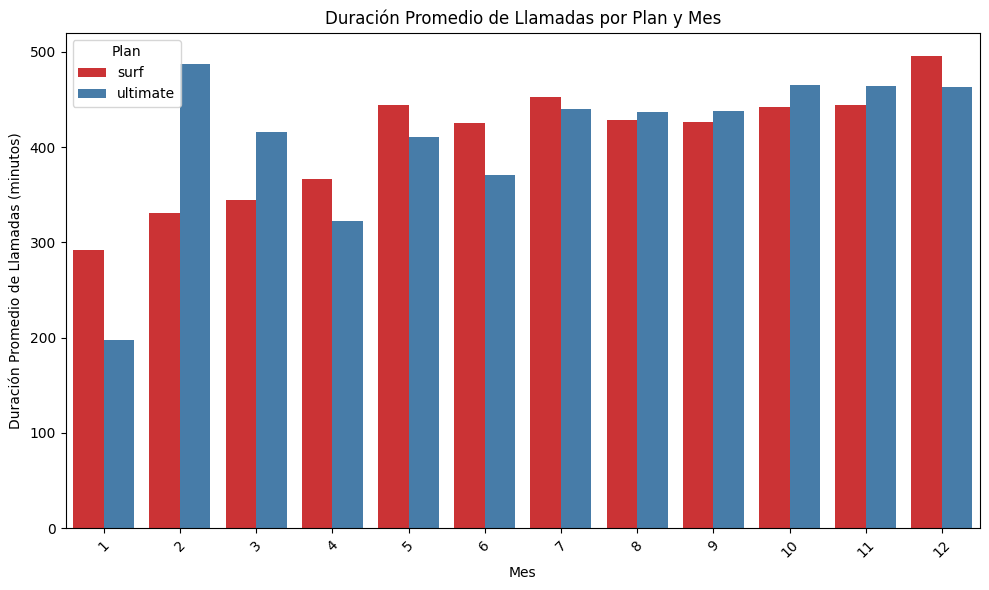

In [115]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Duración promedio de llamadas por cada plan y mes
avg_duration_per_plan_month = combined_data.groupby(['plan', 'month'])['duration'].mean().reset_index()

# Graficar la duración promedio de llamadas por cada plan y mes
plt.figure(figsize=(10,6))
sns.barplot(data=avg_duration_per_plan_month, x='month', y='duration', hue='plan', palette='Set1')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



No handles with labels found to put in legend.


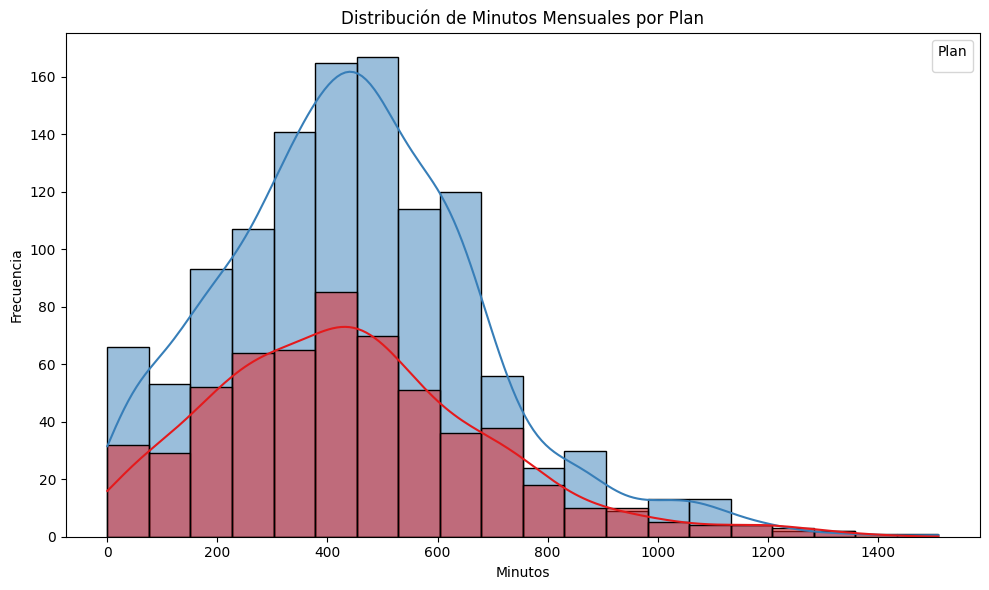

In [116]:
# Histograma de los minutos mensuales por plan
plt.figure(figsize=(10,6))
sns.histplot(data=combined_data, x='duration', hue='plan', kde=True, bins=20, palette='Set1')
plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Minutos')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()
plt.show()



In [117]:
# Calcula la media y la varianza de la duración mensual de llamadas.
call_duration_stats = combined_data.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()
call_duration_stats

,plan,mean,var
0,surf,445.775424,55321.412627
1,ultimate,442.512953,62288.399053


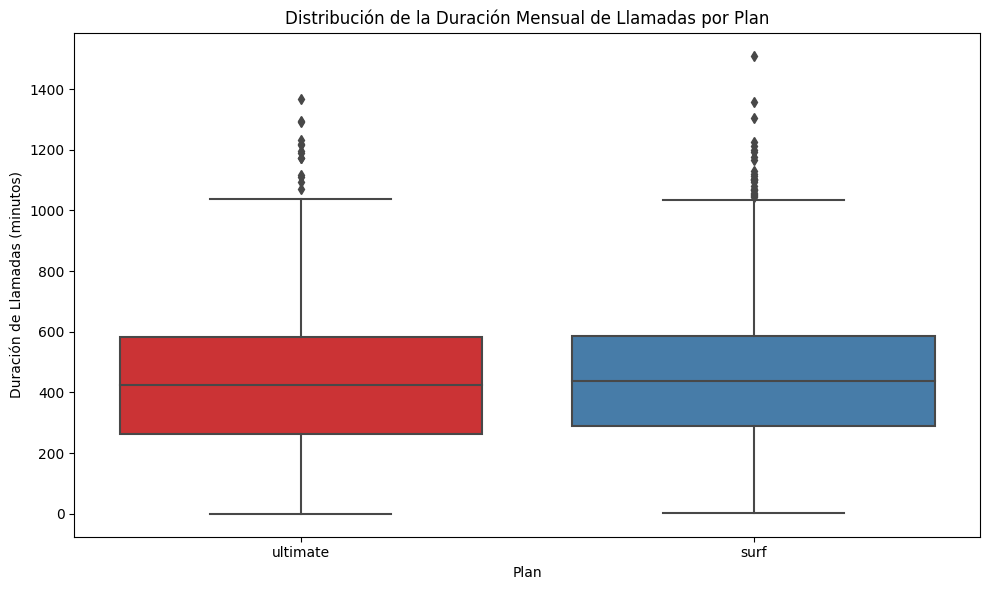

In [118]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Graficar la distribución de la duración mensual de llamadas con un diagrama de caja
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_data, x='plan', y='duration', palette='Set1')
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración de Llamadas (minutos)')
plt.tight_layout()
plt.show()


Las llamadas parecen comportarse de la misma manera en ambos planes. Se observa que algunos usuarios generan cargos adicionales, pero en este caso, la diferencia no se debe al tipo de paquete, ya que entre Surf y Ultimate los ingresos extra son casi iguales.

### Mensajes

In [119]:
message_stats= combined_data.groupby('plan')['message_count'].agg(['mean', 'var']).reset_index()
message_stats

,plan,mean,var
0,surf,39.489831,1044.217878
1,ultimate,46.455959,1084.393818


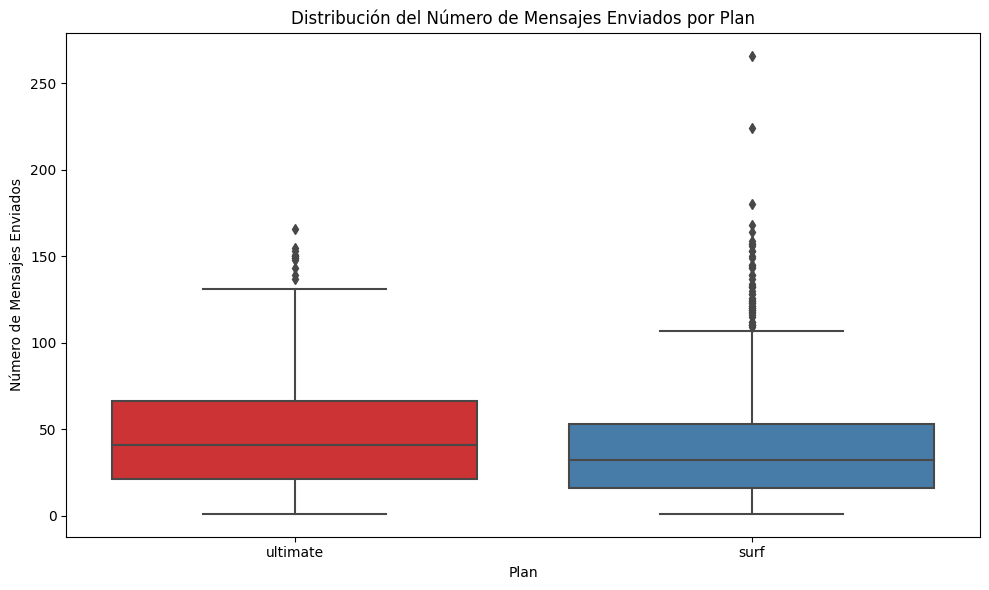

In [120]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
plt.figure(figsize=(10,6))

# Gráfico de barras
sns.boxplot(data=combined_data, x='plan', y='message_count', palette='Set1')

# Título y etiquetas
plt.title('Distribución del Número de Mensajes Enviados por Plan')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Enviados')

# Ajustar el layout para que todo se vea bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()



En cuanto a los mensajes, parece ser la mejor manera de generar ingresos adicionales, especialmente en el plan Surf, ya que ofrece una menor cantidad de mensajes y parece que nuestros usuarios se comunican en gran medida a través de mensajes de texto.

### Internet

In [121]:
internet_stats= combined_data.groupby('plan')['Total_GB_used'].agg(['mean', 'var']).reset_index()
internet_stats

,plan,mean,var
0,surf,16.752542,57.012504
1,ultimate,17.343696,56.174056


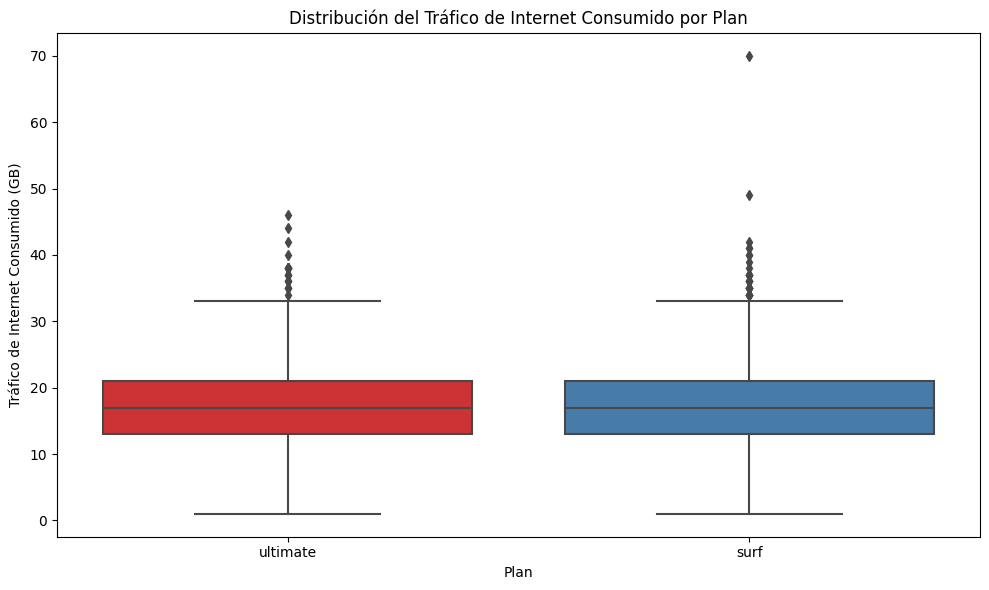

In [122]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Gráfico de cajas para comparar el tráfico de Internet consumido por los usuarios de cada plan
plt.figure(figsize=(10,6))

# Gráfico de cajas
sns.boxplot(data=combined_data, x='plan', y='Total_GB_used', palette='Set1')

# Título y etiquetas
plt.title('Distribución del Tráfico de Internet Consumido por Plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet Consumido (GB)')

# Ajustar el layout para que todo se vea bien
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El tráfico de internet entre ambos planes es muy similar, y los cargos adicionales en internet parecen ser menores en comparación con otras áreas. 

## Ingreso

In [123]:
internet_stats= combined_data.groupby('plan')['ingresos_mes_extra'].agg(['mean', 'var']).reset_index()
internet_stats

,plan,mean,var
0,surf,60.415839,2872.503215
1,ultimate,72.248705,121.758108


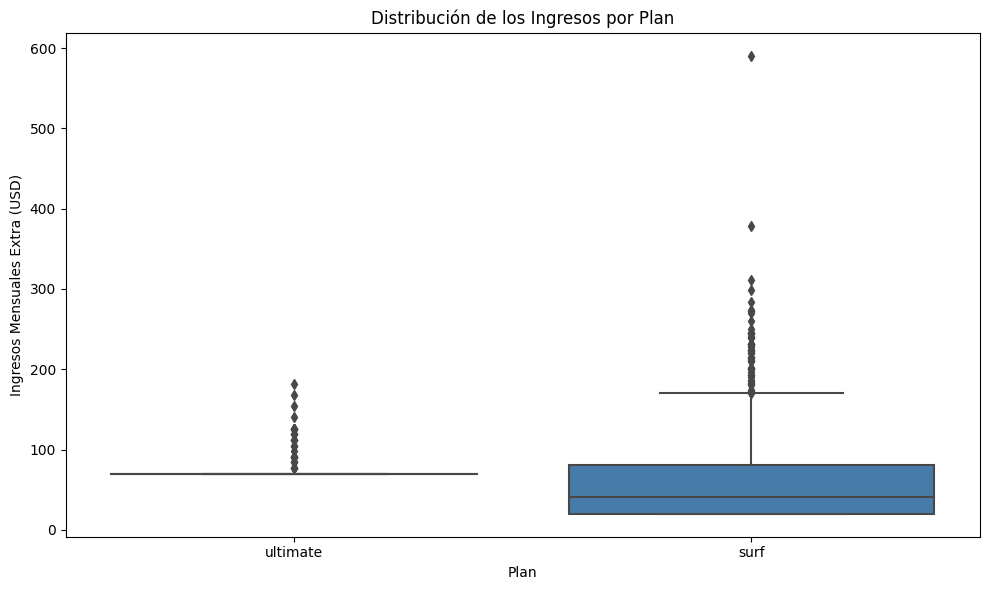

In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(data=combined_data, x='plan', y='ingresos_mes_extra', palette='Set1')
plt.title('Distribución de los Ingresos por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales Extra (USD)')
plt.tight_layout()
plt.show()

In [129]:
combined_data.groupby('plan')['ingresos_mes_extra'].sum()

plan
surf        71290.69
ultimate    41832.00
Name: ingresos_mes_extra, dtype: float64

El ingreso del plan Surf es considerablemente mayor debido a la presencia de más cargos adicionales en los usuarios.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

La forma como analizaste los datos de llamadas fue perfecto ya que incluía herramientas de visualización como los histogramas, además de los calculos de valores estadísticos (media y varianza). Repite esta misma estrucutra para los datos de consumo de mensajes e internet, asi como los datos de ingresos. 
    
Respecto a la información sobre **Ingresos**, seguramente las gráficas y datos que obtuviste cambiarán cuando hagas el ajuste en el cálculo de los cobros mensuales por usuario en cada plan, entonces vale la pena revisar si tu análisis deba ser ajustado también.

Recuerda que es muy importante incluir tu análisis de la información que obtienes.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo Dante, ahora el análisis del comportamiento de consumo de los usuarios de cada plan es correcto

</div>

## Prueba las hipótesis estadísticas

hioptesis nula: ultimte y surf no tienen diferencia en los ingresos 
    
hipotesis alterna: ultimate y surf tienen difrencia de ingresos 

In [125]:
from scipy import stats

# Filtrar los datos para los planes 'ultimate' y 'surf'
ultimate_data = combined_data[combined_data['plan'] == 'ultimate']['ingresos_mes_extra']
surf_data = combined_data[combined_data['plan'] == 'surf']['ingresos_mes_extra']

# Primero, realizar la prueba de Levene para comparar la igualdad de varianzas
levene_stat, levene_p_value = stats.levene(ultimate_data, surf_data)

# Mostrar el valor p de la prueba de Levene
print(f"Valor p de la prueba de Levene: {levene_p_value}")

# Definir el umbral de significancia
alpha = 0.05

# Si el valor p de Levene es menor que alpha, las varianzas son diferentes
if levene_p_value < alpha:
    print("Rechazamos la hipótesis nula de igualdad de varianzas. Las varianzas son diferentes.")
    # Usar equal_var=False si las varianzas son diferentes
    t_stat, p_value = stats.ttest_ind(ultimate_data, surf_data, equal_var=False)
else:
    print("No se rechaza la hipótesis nula de igualdad de varianzas. Las varianzas son iguales.")
    # Usar equal_var=True si las varianzas son iguales
    t_stat, p_value = stats.ttest_ind(ultimate_data, surf_data)

# Imprimir los resultados de la prueba t de Student
print(f"Valor t: {t_stat}")
print(f"Valor p de la t de Student: {p_value}")

# Decisión final sobre la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.")
else:
    print("No se rechaza la hipótesis nula. No hay una diferencia significativa en los ingresos promedio.")

Valor p de la prueba de Levene: 2.0941791851303886e-69
Rechazamos la hipótesis nula de igualdad de varianzas. Las varianzas son diferentes.
Valor t: 7.276268189271249
Valor p de la t de Student: 5.756661975640558e-13
Rechazamos la hipótesis nula. Existe una diferencia significativa en los ingresos promedio.


hipotesis nula : el ingreso promedio del area NY-NJ es igual a las otras regiones.

hipotesis alterna : el ingreso del area NY-NJ es diferente a las otras regiones.

In [126]:
# Prueba las hipótesis

combined_data[combined_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos_mes_extra']

combined_data[combined_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['ingresos_mes_extra']
 
results = stats.ttest_ind(ultimate_data,surf_data)
#resultado

print(f"Valor p: {results.pvalue }")

# Decisión
alpha = 0.05
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula.el el ingreso del area NY-NJ es diferente a las otras regiones .")
else:
    print("No se rechaza la hipótesis nula.el ingreso del area NY-NJ es igual a las otras regiones. .")

Valor p: 1.6396969942407258e-07
Rechazamos la hipótesis nula.el el ingreso del area NY-NJ es diferente a las otras regiones .


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Dante aplicaste correctamente la prueba de hipótesis comparando la distribución de dos muestras independientes e interpretando de manera acertada el `p-value` obtenido y su relación con la hipótesis nula

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Como recomendación, siempre muestra el valor del *p-value*, lo hiciste para la primera prueba de hipótesis, pero no para la segunda. Esto es clave para identificar si tal vez obtenemos `p_value = nan` lo que puede ser un indicio de que algo no está bien.
    
Por otro lado, te recomiendo realizar previamente una prueba de  [Levene](https://www.educaopen.com/digital-lab/blog/educacion-digital/prueba-de-levene) para evaluar la igualdad de las varianzas, lo que te permitirá configurar adecuadamente el parámetro **equal_var** en la función `ttest_ind`. Esto permitirá una interpretación más precisa de los resultados además garantizará que la prueba t sea estadísticamente válida.
</div>
</div>

## Conclusión general


En resumen, el análisis muestra que el plan Surf genera más ingresos que el plan Ultimate, principalmente por los cargos adicionales por mensajes de texto, ya que ofrece menos mensajes incluidos. Aunque el uso de internet y las llamadas es similar en ambos planes, los cargos extra en Surf contribuyen más a los ingresos. Se descartó la hipótesis de que no hay diferencias entre los ingresos de ambos planes, confirmando que sí existen diferencias. También se observó que los ingresos en la zona de NY-NJ son significativamente distintos a los de otras regiones. Estos hallazgos permiten a la empresa ajustar tanto sus estrategias de marketing como sus tarifas y servicios, maximizando los ingresos y optimizando su enfoque en las zonas y características de consumo más rentables.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Aunque tu conclusión es válida de acuerdo a la información que obtuviste, vale la pena revisarla cuando hagas los ajustes que te he mencionado más arriba

</div>